In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import re

# Specify the path to the files
file_paths = glob.glob(r'C:\Users\thoma\Code\Projects\Fantasy-Premier-League\Data\Team\Defensive\*.csv')

# Define a function to extract the week number from the filename
def extract_week_number(filename):
    match = re.search(r'GW_(\d+)', filename)
    return int(match.group(1)) if match else None

# Read each file and add the 'Week' column
weekly_data = pd.concat(
    [pd.read_csv(file).assign(Week=extract_week_number(file)) for file in file_paths],
    ignore_index=True
)

# Change 'VS team' information to 'Team
weekly_data['Team'] = weekly_data['Team'].str[3:]

In [18]:
# Defensive data
defensive_data = weekly_data[['Team', 'Week', 'PerformanceG+A']]

In [19]:
# Create DataFrame
df = pd.DataFrame(defensive_data)

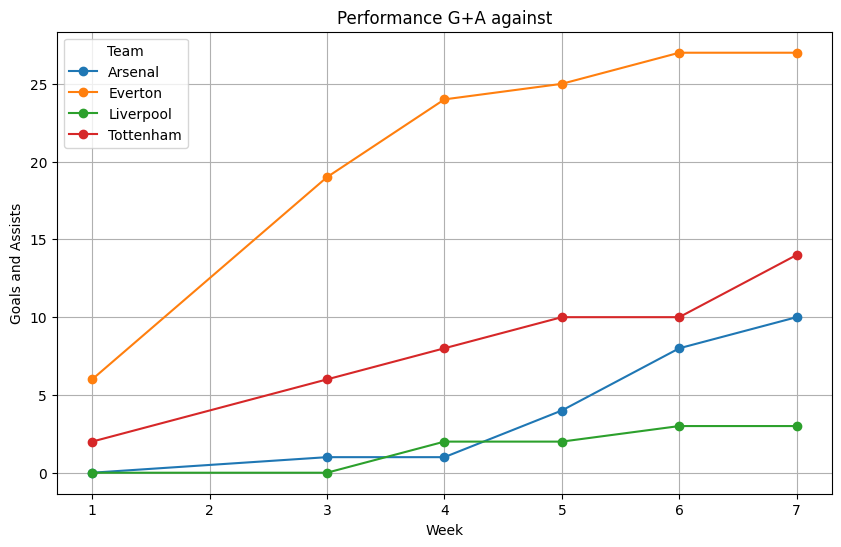

In [23]:
# Create the plot
plt.figure(figsize=(10, 6))

# Plotting for each team
for team in df['Team'].unique():
    if team == 'Liverpool' or team =='Arsenal' or team == 'Tottenham' or team == 'Everton':
        team_data = df[df['Team'] == team]
        plt.plot(team_data['Week'], team_data['PerformanceG+A'], marker='o', label=team)

# Customizing the graph
plt.title('Performance G+A against')
plt.xlabel('Week')
plt.ylabel('Goals and Assists')
plt.legend(title='Team')
plt.grid(True)

# Show the plot
plt.show()

In [5]:
# Calculate Liverpools xG against only for home games

# Find out which weeks Liverpool played at home
fixtures = pd.read_csv(r'C:\Users\thoma\Code\Projects\Fantasy-Premier-League\Data\Fixtures\Fixtures.csv')

In [6]:
# Gameweek number
gameweek = 8

In [7]:
def team_home_data(team, fixtures, gameweek):
    # Create a list to store the results
    home_data = []

    # Iterate over each row of the fixtures DataFrame
    for index, row in fixtures.iterrows():
        # Check if the row's team matches the input team
        if row['Team'] == team:
            # Loop through the columns corresponding to gameweeks
            for col in fixtures.columns[1:gameweek + 1]:
                if 'H' in row[col]:  # Check if it's a home game
                    home_data.append(col)

    # Remove 'GW' from string and convert to integer
    home_data = [int(item[2:]) for item in home_data]

    # Return the collected home data
    return home_data

In [8]:
def team_away_data(team, fixtures, gameweek):
    # Create a list to store the results
    away_data = []

    # Iterate over each row of the fixtures DataFrame
    for index, row in fixtures.iterrows():
        # Check if the row's team matches the input team
        if row['Team'] == team:
            # Loop through the columns corresponding to gameweeks
            for col in fixtures.columns[1:gameweek + 1]:
                if 'A' in row[col]:  # Check if it's an away game
                    away_data.append(col)

    # Remove 'GW' from string and convert to integer
    away_data = [int(item[2:]) for item in away_data]

    # Return the collected home data
    return away_data

In [9]:
# Get liverpool home-gameweeks 
home_data = team_home_data('Liverpool', fixtures, gameweek)

In [24]:
defensive_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Team            120 non-null    object
 1   Week            120 non-null    int64 
 2   PerformanceG+A  120 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 2.9+ KB


In [25]:
for index, row in defensive_data.iterrows():
    if row['Team'] == 'Liverpool':
        print(row)

Team              Liverpool
Week                      1
PerformanceG+A            0
Name: 11, dtype: object
Team              Liverpool
Week                      3
PerformanceG+A            0
Name: 31, dtype: object
Team              Liverpool
Week                      4
PerformanceG+A            2
Name: 51, dtype: object
Team              Liverpool
Week                      5
PerformanceG+A            2
Name: 71, dtype: object
Team              Liverpool
Week                      6
PerformanceG+A            3
Name: 91, dtype: object
Team              Liverpool
Week                      7
PerformanceG+A            3
Name: 111, dtype: object
